In [81]:
import wofost_lut_WLP
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from src import Trial
from geopy.geocoders import Nominatim
import json, glob, os
from math import ceil
import json
from Q_test import generate_ensemble_per_year

In [186]:
district_yield_fn = '../Empirical-yield/Ghana-Crop-Empirical-yield/Ghana_Distirct_level_Crop_Yield_Data-upto2018_NORTHERN-ONLY.csv'
county_file = './Q_test/trials/County_XY_NorthernGhana.csv'

trial = Trial(fname=trial_fn)
print('*******', trial.trial_name)

Read Q_test/trials/config_Maize_Dodzie_TamaleMetro_2009.json. Now populating class
[-0.8419489] [9.4347857] {'latitude': 9.4347857, 'longitude': -0.8419489}
location(latitude=9.4347857, longitude=-0.8419489)
Set location to -0.8419489, 9.4347857
Set managment to management(sowing_date=datetime.datetime(2009, 7, 1, 0, 0), harvesting_date=datetime.datetime(2009, 11, 30, 0, 0), irrigation=None, fertiliser=None, cultivar='Dodzie')
Set observations to observations(emergence_date=None, anthesis_date=None, maturity_date=None, LAI=None, S2_LAI=None, county_yield=None, AGB=None, WLV=None, WST=None, WSO=None, GASST=None, HINDEX=None)
Populated object from file Q_test/trials/config_Maize_Dodzie_TamaleMetro_2009.json
******* TamaleMetro_2009


# exploring metero vs maxlai / yield
* plot yield / lai space
* see if there is a stable relationship? whether they shift around from year to year (use diff colors to visualise)?
* is the weather in 2018 different from the previous years
* examine the mapping between weather and constraints (yield, maxlai)


also visualise the input space: PAR/ TEMP/ tranjectories

* also plot prior and posterior 
* given how sensible the yields are form rain,
* change just AMAX up and down (leave everything else except RGRLAI to default of 'tropical maize') for each year to see if the yield change

# Sample space between WAV (water availible) and AMAX

# three yield, delta_yield & MAXLAI error surfaces:
1. fixed pre-season soil moisture in first step, and run error surface with water-limited model by varying AMAX. Run first pass for all years.
2. 
* include r2, etc. dont use RMSE, just absolute errors for noisy data
* gif movies for all years

In [422]:
def yield_of_year(year, district='Tamale Metro'):
    df_yields = pd.read_csv('../Empirical-yield/Ghana-Crop-Empirical-yield/Ghana_Distirct_level_Crop_Yield_Data-upto2018_NORTHERN-ONLY.csv')
    df_yields = df_yields[df_yields['CROP']=='MAIZE']
    yield_all_year = df_yields[df_yields['DISTRICT']==district]
    yield_one_year =df_yields[(df_yields['DISTRICT']==district) & (df_yields['YEAR']==year)]['YIELD'].values[0]
    return yield_one_year, yield_all_year

In [423]:
yield_one_year, yield_all_year = yield_of_year(2006)

print(f"Yield of year {year} = {yield_one_year}") 
print(f"All year avg = {yield_all_year['YIELD'].mean()} (std = {yield_all_year['YIELD'].std()})")

yield_range = [(yield_one_year-2*yield_all_year['YIELD'].std())*1000, (yield_one_year+2*yield_all_year['YIELD'].std())*1000]

Yield of year 2006 = 1.5
All year avg = 1.5023076923076923 (std = 0.3072228790892655)


In [416]:
year = 2006
trial_fn = f"./Q_test/trials/config_Maize_Dodzie_TamaleMetro_{year}.json"
PARAM_WLP_FN = "WOFOST_params_Maize_Ghana_Qtest-Srivastava-WLP-selected.csv"

In [302]:

fname_out, comm_idx, xx, lai, Yields, dvs = generate_ensemble_per_year(trial_fn, PARAM_WLP_FN, out_folder="./Q_test",
                               nsamples=50, samples=None, OVERWRITE=True)

Read Q_test/trials/config_Maize_Dodzie_TamaleMetro_2006.json. Now populating class
[-0.8419489] [9.4347857] {'latitude': 9.4347857, 'longitude': -0.8419489}
location(latitude=9.4347857, longitude=-0.8419489)
Set location to -0.8419489, 9.4347857
Set managment to management(sowing_date=datetime.datetime(2006, 7, 1, 0, 0), harvesting_date=datetime.datetime(2006, 11, 30, 0, 0), irrigation=None, fertiliser=None, cultivar='Dodzie')
Set observations to observations(emergence_date=None, anthesis_date=None, maturity_date=None, LAI=None, S2_LAI=None, county_yield=None, AGB=None, WLV=None, WST=None, WSO=None, GASST=None, HINDEX=None)
Populated object from file Q_test/trials/config_Maize_Dodzie_TamaleMetro_2006.json
	Creating config files...
	Done with config files...
2022-02-07 18:09:18.991811 Drawing prior samples....
2022-02-07 18:09:19.029279 Running model
2022-02-07 18:09:19.680091 	 Done 0 sims
2022-02-07 18:09:19.681161 		0.0 seconds/sim
2022-02-07 18:09:46.839896 Done simulating
2022-02-0

['AMAXTB_000' 'AMAXTB_150' 'AMAXTB_175' 'AMAXTB_200' 'DOS' 'WAV']
885.5542418214691 2114.445758178531
30 0.94646764 2142.8586
	 [ 52.15264247  24.10595293  11.15100463  13.76140171 176.15714765
  24.34808839]
33 1.0786337 2702.082
	 [ 42.94165504  18.64704105  40.28470115  10.75767009 187.73120952
  19.33844623]
[[ 52.15264247  24.10595293  11.15100463  13.76140171 176.15714765
   24.34808839]
 [ 42.94165504  18.64704105  40.28470115  10.75767009 187.73120952
   19.33844623]]


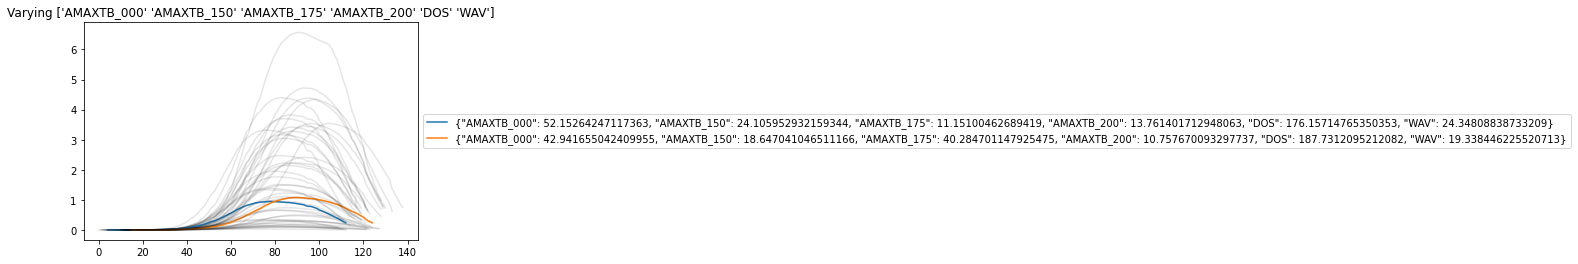

In [305]:
selected_param = []

df_params = pd.read_csv(PARAM_WLP_FN, comment="#")
DF_VARY = df_params[df_params.Distribution=="Gaussian"]
param_list = DF_VARY.Parameter.unique()
print(param_list)
print( yield_range[0], yield_range[1])
for i in range(len(lai)):
    plt.plot(lai[i], 'k',alpha=0.1)
    plt.title(f'Varying {param_list}')
    if (np.nanmax(lai[i])> 0.9) & (np.nanmax(lai[i]) < 4.5):
        if (Yields[i]>yield_range[0]) & (Yields[i]<3000):
            dictionary = dict(zip(param_list, xx[i]))
            plt.plot(lai[i],alpha=1, label=json.dumps(dictionary))
            print(i, np.nanmax(lai[i]), Yields[i])
            print('\t',xx[i])
            selected_param.append(xx[i])
        
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
selected_param = np.array(selected_param)
print(selected_param)

In [306]:
print(xx.shape)
print(xx.mean(axis=0))

print(selected_param.shape)
print(selected_param.mean(axis=0))

(50, 6)
[ 46.94246228  31.40507539  32.57091554  11.45530927 182.89273912
  22.21328005]
(2, 6)
[ 47.54714876  21.37649699  25.71785289  12.2595359  181.94417859
  21.84326731]


Tristen's soil moisture on the starting date, i.e. date of sowing;
and set it as WAV (unit conversion).
scaling factor to get the right WAV values;
varying scaling factor, amax, and DOS, 

**Or just manually find a suitable WAV and only vary AMAX**, 
start simulation e.g. 100 days before planting, so the WAV won't matter that much. filter DOS to 

(array([14.,  4.,  4.,  5.,  4.,  2.,  7.,  7.,  1.,  2.]),
 array([   60.302937,  1111.0315  ,  2161.76    ,  3212.4888  ,
         4263.2173  ,  5313.946   ,  6364.6743  ,  7415.4033  ,
         8466.132   ,  9516.86    , 10567.589   ], dtype=float32),
 <BarContainer object of 10 artists>)

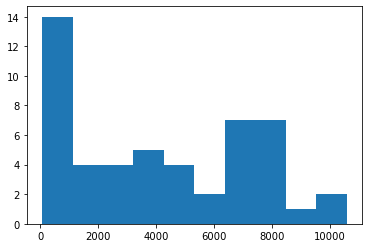

In [307]:
plt.hist(Yields)

In [ ]:
plt.hist(Yields)
plt.errorbar(yield_one_year, )

# Using run_model function with set parameters (no random sampling) instead

In [410]:
from wofost_lut_WLP import run_model

def run_amax_test(params_file, year, k_scale=np.linspace(3.5, 0.1, 5), wavs=range(3,10)):
    
    df = pd.read_csv(params_file, comment="#")
    parameter_names = df[df.Distribution=="Gaussian"].Parameter.tolist()
    print('parameter_names',parameter_names)
    amax_locs = np.array([i for i,p in
                            enumerate(parameter_names)
                            if p.find("AMAX")>=0])
    print('amax_locs:',amax_locs)
    
    dos_loc = np.array([i for i,p in
                            enumerate(parameter_names)
                            if p.find("DOS")>=0])
    print('dos_loc:', dos_loc)
    
    wav_loc = np.array([i for i,p in
                            enumerate(parameter_names)
                            if p.find("WAV")>=0])
    print('wav_loc:', wav_loc)
    
    mu = df.Y.values*df.Scale.values
    #print('mu=',mu)


    t = []
    parameters = []
    lais = []
    yields = []
    DVS = []
    for k in k_scale:
        print('k=',k)
        this_mu = mu*1
        this_mu[amax_locs] = mu[amax_locs] * k
        
        samples = []
        for planting_date in np.arange(180, 185, 5):
            #for tdwi in np.arange(4, 10, 2):
            this_mu[dos_loc] = planting_date
            #this_mu[1] = tdwi
            
            for wav in wavs:
                this_mu[wav_loc] = wav
                samples.append(this_mu*1)
                #print('this_mu:', this_mu)

        #print('samples:',samples)
        
        
        trial_fn = f"./Q_test/trials/config_Maize_Dodzie_TamaleMetro_{year}.json"
        fname_out, comm_idx, xx, lai, Yields, DVSx = generate_ensemble_per_year(trial_fn, params_file, out_folder="./Q_test",
                               nsamples=None, samples=samples, OVERWRITE=True)

        t.append(comm_idx)
        parameters.append(xx)
        lais.append(lai)
        yields.append(Yields)
        DVS.append(DVSx)
        
    return np.array(t), np.array(parameters), np.array(lais), np.array(yields), np.array(DVS)

In [417]:
k_scale = np.linspace(1.1, 0.1, 10)
wavs=range(3,10)
PARAM_WLP_FN = "WOFOST_params_Maize_Ghana_Qtest-Srivastava-WLP-selected.csv"
t, parameters, lais, yields, DVS = run_amax_test(PARAM_WLP_FN, 2006, k_scale=k_scale, wavs=range(3,10))

parameter_names ['AMAXTB_000', 'AMAXTB_150', 'AMAXTB_175', 'AMAXTB_200', 'DOS', 'WAV']
amax_locs: [0 1 2 3]
dos_loc: [4]
wav_loc: [5]
k= 1.1
Read Q_test/trials/config_Maize_Dodzie_TamaleMetro_2006.json. Now populating class
[-0.8419489] [9.4347857] {'latitude': 9.4347857, 'longitude': -0.8419489}
location(latitude=9.4347857, longitude=-0.8419489)
Set location to -0.8419489, 9.4347857
Set managment to management(sowing_date=datetime.datetime(2006, 7, 1, 0, 0), harvesting_date=datetime.datetime(2006, 11, 30, 0, 0), irrigation=None, fertiliser=None, cultivar='Dodzie')
Set observations to observations(emergence_date=None, anthesis_date=None, maturity_date=None, LAI=None, S2_LAI=None, county_yield=None, AGB=None, WLV=None, WST=None, WSO=None, GASST=None, HINDEX=None)
Populated object from file Q_test/trials/config_Maize_Dodzie_TamaleMetro_2006.json
	Creating config files...
	Done with config files...
2022-02-07 19:40:18.881641 Drawing prior samples....
2022-02-07 19:40:18.881686 Running mod

	Done with config files...
2022-02-07 19:41:19.280355 Drawing prior samples....
2022-02-07 19:41:19.280387 Running model
2022-02-07 19:41:19.889161 	 Done 0 sims
2022-02-07 19:41:19.889772 		0.0 seconds/sim
2022-02-07 19:41:23.523914 Done simulating
2022-02-07 19:41:23.536865 Saving to ./Q_test/outputs/TamaleMetro_2006_Maize_2006_153.npz
2022-02-07 19:41:23.540728 All done
k= 0.21111111111111125
Read Q_test/trials/config_Maize_Dodzie_TamaleMetro_2006.json. Now populating class
[-0.8419489] [9.4347857] {'latitude': 9.4347857, 'longitude': -0.8419489}
location(latitude=9.4347857, longitude=-0.8419489)
Set location to -0.8419489, 9.4347857
Set managment to management(sowing_date=datetime.datetime(2006, 7, 1, 0, 0), harvesting_date=datetime.datetime(2006, 11, 30, 0, 0), irrigation=None, fertiliser=None, cultivar='Dodzie')
Set observations to observations(emergence_date=None, anthesis_date=None, maturity_date=None, LAI=None, S2_LAI=None, county_yield=None, AGB=None, WLV=None, WST=None, WSO=

In [424]:
lais.shape

(10, 7, 155)

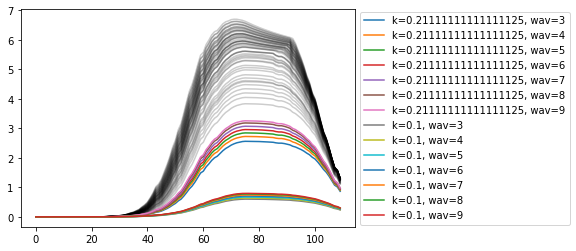

In [428]:
for i, k in enumerate(k_scale):
    for w, wav in enumerate(wavs):
        if k> 0.25:
            plt.plot(lais[i,w], 'k', alpha=0.2)
        else:
            plt.plot(lais[i,w], label=f"k={k_scale[i]}, wav={wav}")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [430]:
print(yields.shape)
print(yields)

(10, 7)
[[17382.365  17411.154  17424.137  17431.676  17435.643  17436.549
  17435.668 ]
 [17276.812  17311.506  17328.055  17338.316  17344.547  17347.594
  17348.025 ]
 [17142.98   17185.91   17207.12   17221.352  17230.832  17236.53
  17238.762 ]
 [16966.805  17021.572  17049.686  17069.383  17083.662  17093.562
  17098.137 ]
 [16721.5    16794.705  16833.59   16862.3    16884.033  16900.21
  16908.734 ]
 [16356.74   16456.318  16514.182  16557.73   16592.352  16620.16
  16635.51  ]
 [15766.51   15905.888  15990.085  16058.594  16117.65   16167.9375
  16197.429 ]
 [14642.673  14854.831  14987.797  15099.788  15199.924  15288.657
  15342.718 ]
 [11787.419  12127.647  12356.817  12558.446  12746.736  12920.99
  13029.085 ]
 [ 3444.7944  3624.0916  3789.9187  3947.6658  4106.6865  4265.382
   4365.648 ]]


The above yields are too high for k> 0.25, **so narrowing down the k scales**:

In [431]:
k_scale = np.linspace(0.25, 0.1, 5)
t, parameters, lais, yields, DVS = run_amax_test(PARAM_WLP_FN, 2006, k_scale=k_scale)

parameter_names ['AMAXTB_000', 'AMAXTB_150', 'AMAXTB_175', 'AMAXTB_200', 'DOS', 'WAV']
amax_locs: [0 1 2 3]
dos_loc: [4]
wav_loc: [5]
k= 0.25
Read Q_test/trials/config_Maize_Dodzie_TamaleMetro_2006.json. Now populating class
[-0.8419489] [9.4347857] {'latitude': 9.4347857, 'longitude': -0.8419489}
location(latitude=9.4347857, longitude=-0.8419489)
Set location to -0.8419489, 9.4347857
Set managment to management(sowing_date=datetime.datetime(2006, 7, 1, 0, 0), harvesting_date=datetime.datetime(2006, 11, 30, 0, 0), irrigation=None, fertiliser=None, cultivar='Dodzie')
Set observations to observations(emergence_date=None, anthesis_date=None, maturity_date=None, LAI=None, S2_LAI=None, county_yield=None, AGB=None, WLV=None, WST=None, WSO=None, GASST=None, HINDEX=None)
Populated object from file Q_test/trials/config_Maize_Dodzie_TamaleMetro_2006.json
	Creating config files...
	Done with config files...
2022-02-07 19:48:22.319624 Drawing prior samples....
2022-02-07 19:48:22.319656 Running mo

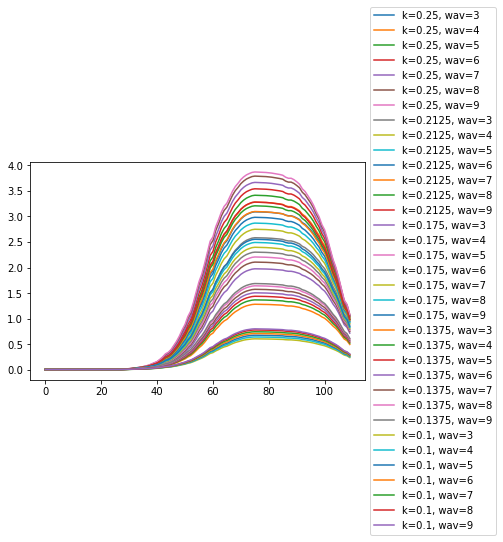

In [434]:
for i, k in enumerate(k_scale):
    for w, wav in enumerate(wavs):
        if lais[i,w].max() > 3:
            plt.plot(lais[i,w], 'k', alpha=0.2)
        else:
            plt.plot(lais[i,w], label=f"k={k_scale[i]}, wav={wav}")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [442]:
print(yields)
print(yield_of_year(2006)[0]*1000)

[[13151.011  13444.079  13633.257  13796.788  13946.876  14083.43
  14167.631 ]
 [11846.453  12185.2    12412.894  12613.083  12799.9    12972.676
  13079.829 ]
 [ 9887.45   10253.498  10516.618  10752.988  10978.249  11190.886
  11323.616 ]
 [ 7008.1924  7337.277   7598.181   7839.0977  8074.979   8303.621
   8447.437 ]
 [ 3444.7944  3624.0916  3789.9187  3947.6658  4106.6865  4265.382
   4365.648 ]]
1500.0


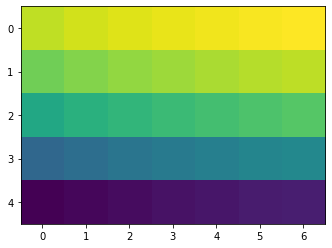

In [443]:
plt.imshow(yields-yield_of_year(2006)[0]*1000)

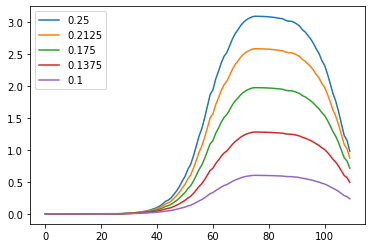

In [435]:
for i in range(len(k_scale)):
    for j in range(1):
        plt.plot(lais[i,j], label=k_scale[i])
plt.legend()

# Loop over years to generate Yield error surface:

parameter_names ['AMAXTB_000', 'AMAXTB_150', 'AMAXTB_175', 'AMAXTB_200', 'DOS', 'WAV']
amax_locs: [0 1 2 3]
dos_loc: [4]
wav_loc: [5]
k= 0.25
Read Q_test/trials/config_Maize_Dodzie_TamaleMetro_2006.json. Now populating class
[-0.8419489] [9.4347857] {'latitude': 9.4347857, 'longitude': -0.8419489}
location(latitude=9.4347857, longitude=-0.8419489)
Set location to -0.8419489, 9.4347857
Set managment to management(sowing_date=datetime.datetime(2006, 7, 1, 0, 0), harvesting_date=datetime.datetime(2006, 11, 30, 0, 0), irrigation=None, fertiliser=None, cultivar='Dodzie')
Set observations to observations(emergence_date=None, anthesis_date=None, maturity_date=None, LAI=None, S2_LAI=None, county_yield=None, AGB=None, WLV=None, WST=None, WSO=None, GASST=None, HINDEX=None)
Populated object from file Q_test/trials/config_Maize_Dodzie_TamaleMetro_2006.json
	Creating config files...
	Done with config files...
2022-02-07 19:58:04.533109 Drawing prior samples....
2022-02-07 19:58:04.533140 Running mo


	Done with config files...
2022-02-07 19:59:45.059333 Drawing prior samples....
2022-02-07 19:59:45.059498 Running model
2022-02-07 19:59:45.730512 	 Done 0 sims
2022-02-07 19:59:45.731333 		0.0 seconds/sim
2022-02-07 19:59:49.576241 Done simulating
2022-02-07 19:59:49.584848 Saving to ./Q_test/outputs/TamaleMetro_2007_Maize_2007.npz
2022-02-07 19:59:49.589697 All done
k= 0.2125
Read Q_test/trials/config_Maize_Dodzie_TamaleMetro_2007.json. Now populating class
[-0.8419489] [9.4347857] {'latitude': 9.4347857, 'longitude': -0.8419489}
location(latitude=9.4347857, longitude=-0.8419489)
Set location to -0.8419489, 9.4347857
Set managment to management(sowing_date=datetime.datetime(2007, 7, 1, 0, 0), harvesting_date=datetime.datetime(2007, 11, 30, 0, 0), irrigation=None, fertiliser=None, cultivar='Dodzie')
Set observations to observations(emergence_date=None, anthesis_date=None, maturity_date=None, LAI=None, S2_LAI=None, county_yield=None, AGB=None, WLV=None, WST=None, WSO=None, GASST=None


	Done with config files...
2022-02-07 20:01:06.136907 Drawing prior samples....
2022-02-07 20:01:06.136953 Running model
2022-02-07 20:01:06.812069 	 Done 0 sims
2022-02-07 20:01:06.813136 		0.0 seconds/sim
2022-02-07 20:01:10.709867 Done simulating
2022-02-07 20:01:10.722769 Saving to ./Q_test/outputs/TamaleMetro_2008_Maize_2008.npz
2022-02-07 20:01:10.726743 All done
k= 0.2125
Read Q_test/trials/config_Maize_Dodzie_TamaleMetro_2008.json. Now populating class
[-0.8419489] [9.4347857] {'latitude': 9.4347857, 'longitude': -0.8419489}
location(latitude=9.4347857, longitude=-0.8419489)
Set location to -0.8419489, 9.4347857
Set managment to management(sowing_date=datetime.datetime(2008, 7, 1, 0, 0), harvesting_date=datetime.datetime(2008, 11, 30, 0, 0), irrigation=None, fertiliser=None, cultivar='Dodzie')
Set observations to observations(emergence_date=None, anthesis_date=None, maturity_date=None, LAI=None, S2_LAI=None, county_yield=None, AGB=None, WLV=None, WST=None, WSO=None, GASST=None


	Done with config files...
2022-02-07 20:02:34.060173 Drawing prior samples....
2022-02-07 20:02:34.060233 Running model
2022-02-07 20:02:34.735406 	 Done 0 sims
2022-02-07 20:02:34.737738 		0.0 seconds/sim
2022-02-07 20:02:38.677663 Done simulating
2022-02-07 20:02:38.685191 Saving to ./Q_test/outputs/TamaleMetro_2009_Maize_2009.npz
2022-02-07 20:02:38.690058 All done
k= 0.2125
Read Q_test/trials/config_Maize_Dodzie_TamaleMetro_2009.json. Now populating class
[-0.8419489] [9.4347857] {'latitude': 9.4347857, 'longitude': -0.8419489}
location(latitude=9.4347857, longitude=-0.8419489)
Set location to -0.8419489, 9.4347857
Set managment to management(sowing_date=datetime.datetime(2009, 7, 1, 0, 0), harvesting_date=datetime.datetime(2009, 11, 30, 0, 0), irrigation=None, fertiliser=None, cultivar='Dodzie')
Set observations to observations(emergence_date=None, anthesis_date=None, maturity_date=None, LAI=None, S2_LAI=None, county_yield=None, AGB=None, WLV=None, WST=None, WSO=None, GASST=None


	Done with config files...
2022-02-07 20:03:56.682593 Drawing prior samples....
2022-02-07 20:03:56.682821 Running model
2022-02-07 20:03:57.397179 	 Done 0 sims
2022-02-07 20:03:57.397958 		0.0 seconds/sim
2022-02-07 20:04:01.331596 Done simulating
2022-02-07 20:04:01.337134 Saving to ./Q_test/outputs/TamaleMetro_2010_Maize_2010.npz
2022-02-07 20:04:01.341061 All done
k= 0.2125
Read Q_test/trials/config_Maize_Dodzie_TamaleMetro_2010.json. Now populating class
[-0.8419489] [9.4347857] {'latitude': 9.4347857, 'longitude': -0.8419489}
location(latitude=9.4347857, longitude=-0.8419489)
Set location to -0.8419489, 9.4347857
Set managment to management(sowing_date=datetime.datetime(2010, 7, 1, 0, 0), harvesting_date=datetime.datetime(2010, 11, 30, 0, 0), irrigation=None, fertiliser=None, cultivar='Dodzie')
Set observations to observations(emergence_date=None, anthesis_date=None, maturity_date=None, LAI=None, S2_LAI=None, county_yield=None, AGB=None, WLV=None, WST=None, WSO=None, GASST=None

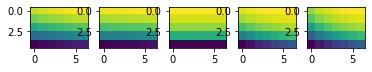

In [445]:
fig, ax = plt.subplots(1,5)
ax = ax.flatten()
for i, year in enumerate(range(2006, 2011)):
    k_scale = np.linspace(0.25, 0.1, 5)
    t, parameters, lais, yields, DVS = run_amax_test(PARAM_WLP_FN, year, k_scale=k_scale, wavs=range(3,10))
    anual_yield = yield_of_year(year)[0]*1000
    ax[i].imshow(yields-anual_yield)
    ax[i].set_title(year)